In [1]:
print("Hello")

Hello


## Load libraries

In [2]:

from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


## load the data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

## preprocessing

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## 1st:

## build arcitecture

In [5]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

c:\Users\Kasarla Vishwaja\Documents\Deep_learning\Deep_Learning\Euro\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## compile

In [6]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## train

In [7]:
result = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1996 - loss: 5.1653 - val_accuracy: 0.3154 - val_loss: 1.8281
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3580 - loss: 1.7263 - val_accuracy: 0.3920 - val_loss: 1.6445
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4432 - loss: 1.5022 - val_accuracy: 0.4478 - val_loss: 1.5135
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4978 - loss: 1.3538 - val_accuracy: 0.4686 - val_loss: 1.4929
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5393 - loss: 1.2684 - val_accuracy: 0.4945 - val_loss: 1.4304
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5712 - loss: 1.1849 - val_accuracy: 0.4932 - val_loss: 1.4763
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5940 - loss: 1.1230 - val_accuracy: 0.5128 - val_loss: 1.4510
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6186 - loss: 1.0646 - val_accuracy: 0.

## evaluate

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test_Accuracy: {accuracy}, Test_Loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5050 - loss: 2.9821
Test_Accuracy: 0.5005999803543091, Test_Loss: 2.9628632068634033


## visualization

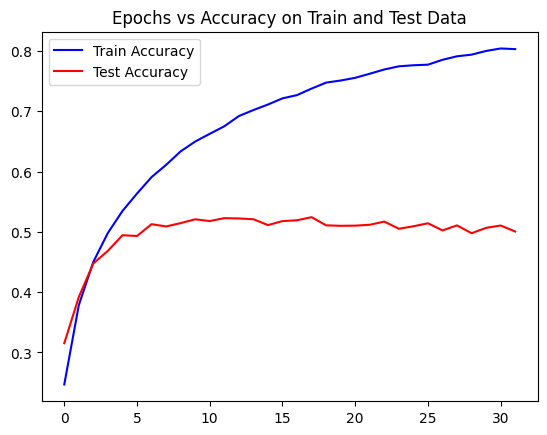

In [9]:
plt.plot(result.history['accuracy'], label='Train Accuracy',color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy',color='red')
plt.legend()
plt.title("Epochs vs Accuracy on Train and Test Data")
plt.show()

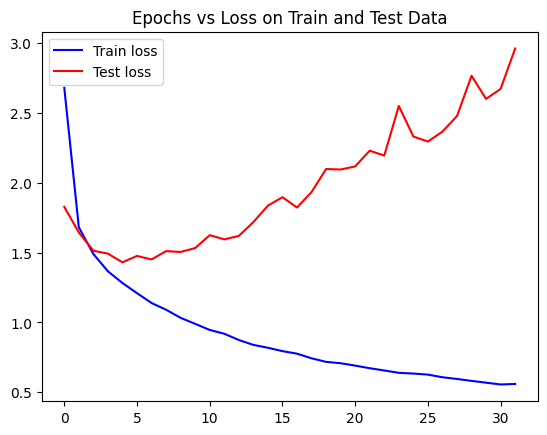

In [10]:
plt.plot(result.history['loss'], label='Train loss',color='blue')
plt.plot(result.history['val_loss'], label='Test loss',color='red')
plt.legend()
plt.title("Epochs vs Loss on Train and Test Data")
plt.show()

## analysis: 
.train accuracy is improved over the epochs, continue training by increasing no. of epochs from 32 to 100
. both test accuracy and test loss are overfitting

## Hyperparameters : epochs=100

## 2nd:

In [11]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test_Accuracy: {accuracy}, Test_Loss: {loss}")

Epoch 1/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1106 - loss: 27.6002 - val_accuracy: 0.0996 - val_loss: 2.3064
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0996 - loss: 2.3031 - val_accuracy: 0.1002 - val_loss: 2.3053
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1004 - loss: 2.3018 - val_accuracy: 0.1002 - val_loss: 2.3069
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0998 - loss: 2.3013 - val_accuracy: 0.1003 - val_loss: 2.3041
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1017 - loss: 2.3017 - val_accuracy: 0.1003 - val_loss: 2.3036
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0989 - loss: 2.3014 - val_accuracy: 0.1003 - val_loss: 2.3045
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0984 - loss: 2.3018 - val_accuracy: 0.1003 - val_loss: 2.3029
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0998 - loss: 2.3021 - val_a

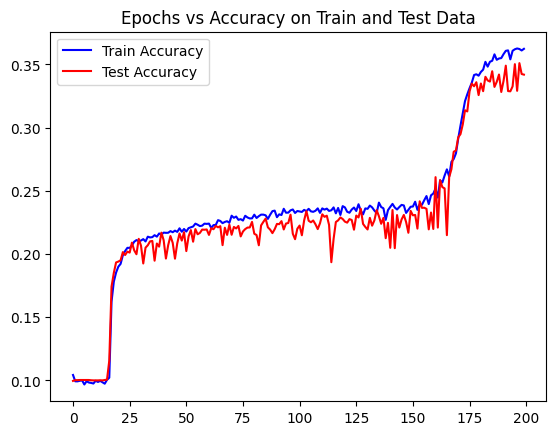

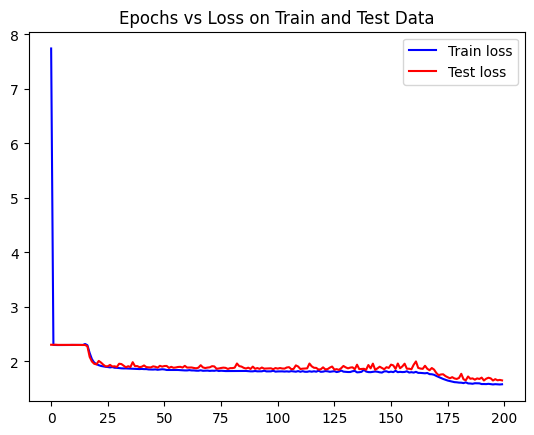

In [13]:
plt.plot(result.history['accuracy'], label='Train Accuracy',color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy',color='red')
plt.legend()
plt.title("Epochs vs Accuracy on Train and Test Data")
plt.show()

plt.plot(result.history['loss'], label='Train loss',color='blue')
plt.plot(result.history['val_loss'], label='Test loss',color='red')
plt.legend()
plt.title("Epochs vs Loss on Train and Test Data")
plt.show()

## analysis: 

.training is very slow so increase the no. of layers 

## 3rd:

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test_Accuracy: {accuracy}, Test_Loss: {loss}")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.2566 - loss: 3.8289 - val_accuracy: 0.4469 - val_loss: 1.5297
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4731 - loss: 1.4646 - val_accuracy: 0.5079 - val_loss: 1.3850
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5535 - loss: 1.2532 - val_accuracy: 0.5575 - val_loss: 1.2570
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6112 - loss: 1.1012 - val_accuracy: 0.5921 - val_loss: 1.1838
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6689 - loss: 0.9488 - val_accuracy: 0.6071 - val_loss: 1.1908
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7061 - loss: 0.8368 - val_accuracy: 0.5928 - val_loss: 1.2822
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7496 - loss: 0.7212 - val_accuracy: 0.6210 - val_loss: 1.2009
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7847 - loss: 0.6180 - 

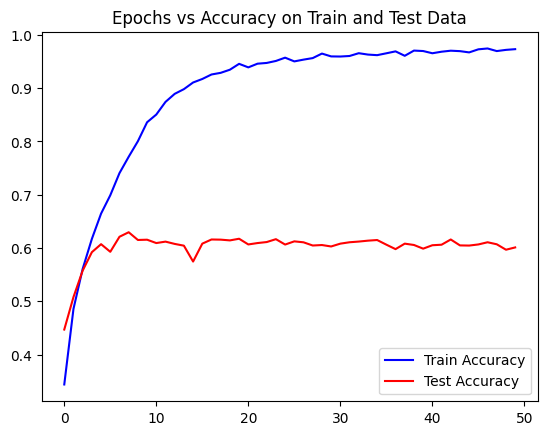

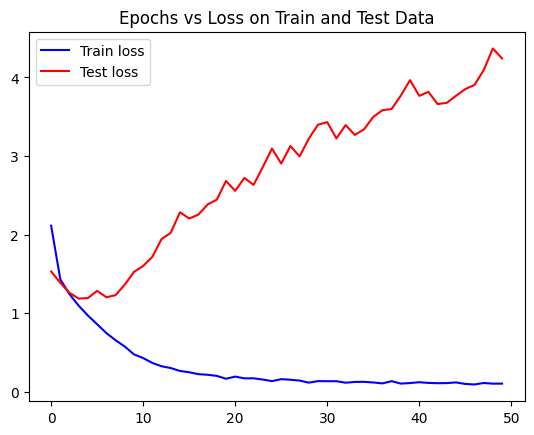

In [15]:
plt.plot(result.history['accuracy'], label='Train Accuracy',color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy',color='red')
plt.legend()
plt.title("Epochs vs Accuracy on Train and Test Data")
plt.show()

plt.plot(result.history['loss'], label='Train loss',color='blue')
plt.plot(result.history['val_loss'], label='Test loss',color='red')
plt.legend()
plt.title("Epochs vs Loss on Train and Test Data")
plt.show()